#    Credit Card Approval Project 

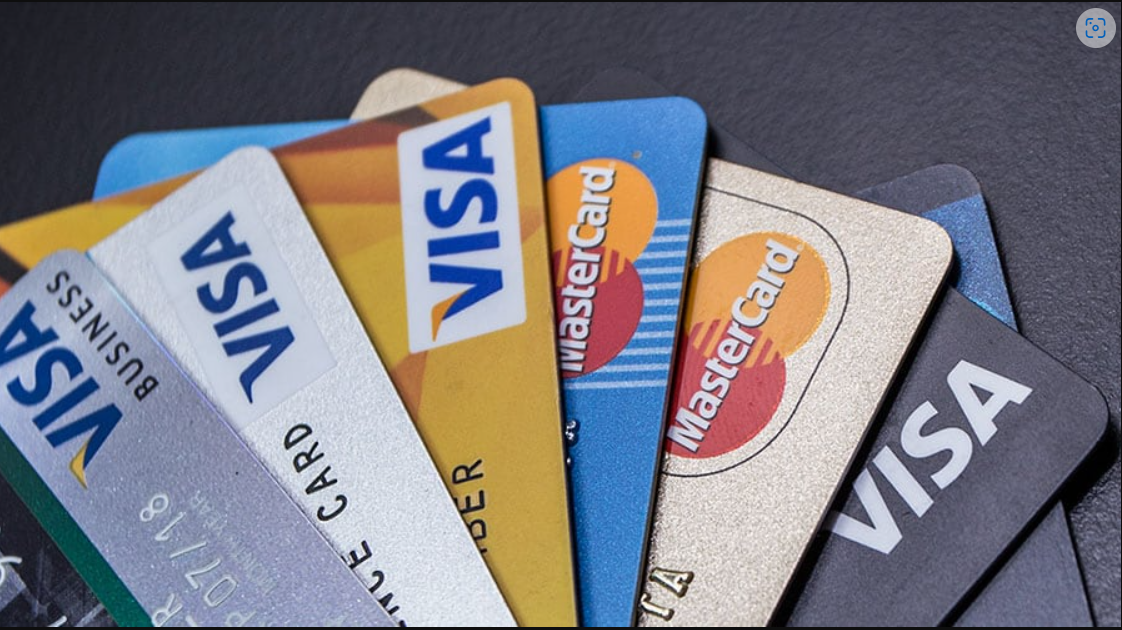

In [94]:
# import Important libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [95]:
# Load the both dataset 
df_1 = pd.read_csv(r"C:\Users\admin\Desktop\Credit Card Capstone Project\Credit_card.csv")
df_2=pd.read_csv(r"C:\Users\admin\Desktop\Credit Card Capstone Project\Credit_card_label.csv")

In [96]:
df_1.head() # Load first five rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [97]:
df_1.tail() # check the last 5 rows of the dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [98]:
df_2.head() #second dataframe head rows

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [99]:
df_2.tail() # second dataframe tail rows

,Ind_ID,label
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0
1547,5053790,0


In [100]:
print(f'df_1 shape = {df_1.shape} \ndf_2 shape ={df_2.shape}') # check the rows and columns of the both dataframe

df_1 shape = (1548, 18) 
df_2 shape =(1548, 2)


In [101]:
df = df_1.merge(df_2,on='Ind_ID') # merge two dataframe into one

# DATA PREPROCESSING

In [102]:
df.describe() # statistical measure of the each column

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [103]:
df.info() # dataset information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [104]:
# drop unnnecessary columns
columns = ['Mobile_phone','Work_Phone','Phone','EMAIL_ID']
df.drop(labels=columns,axis=1,inplace=True) 

In [105]:
df.isna().sum() # check for missing values

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [106]:
df.Annual_income = df.Annual_income/1000 # change **Annual_income** in thousands

Text(0, 0.5, 'Annual income in K')

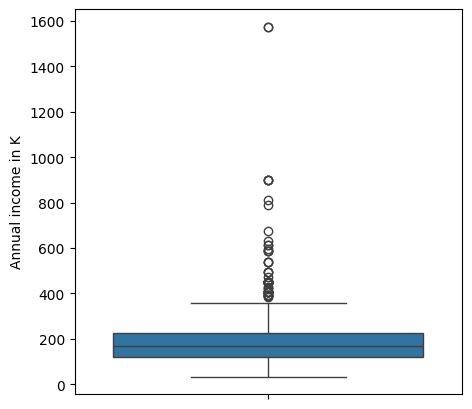

In [107]:
plt.figure(figsize=(5,5)) #set the figure size of the plot 
sns.boxplot(data =df ,y='Annual_income') # use boxplot for checking outlier
plt.ylabel('Annual income in K') # change y label in the boxplot

In [108]:
df['Annual_income'].fillna(df.Annual_income.median(),inplace=True) # fill missing values in the annaual income

In [109]:
# handling the outlier with the max value of the IQR
max = df['Annual_income'].quantile(0.75) + 1.5*(df['Annual_income'].quantile(0.75)-df['Annual_income'].quantile(0.25))
df['Annual_income'] = np.where(df.Annual_income > max,max,df.Annual_income) 

In [110]:
df.Birthday_count = df.Birthday_count/365 # change birthday count in years

In [111]:
df.Birthday_count = df.Birthday_count * -1 # convert years in postive integers

Text(0, 0.5, 'Age')

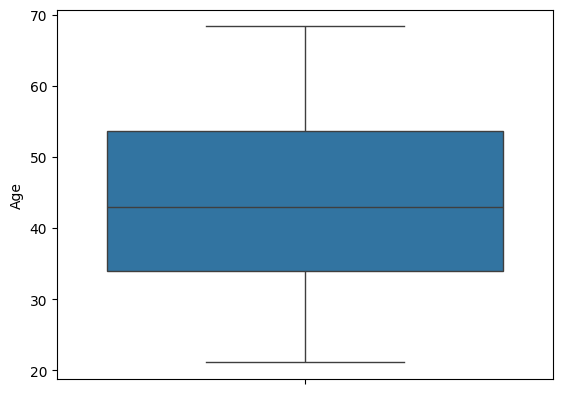

In [112]:
sns.boxplot(data =df ,y='Birthday_count') # check for outlier
plt.ylabel('Age')

In [113]:
df.fillna(df['Birthday_count'].mean(),inplace=True) # fill missing values in the column with median

<Axes: xlabel='Employed_days', ylabel='count'>

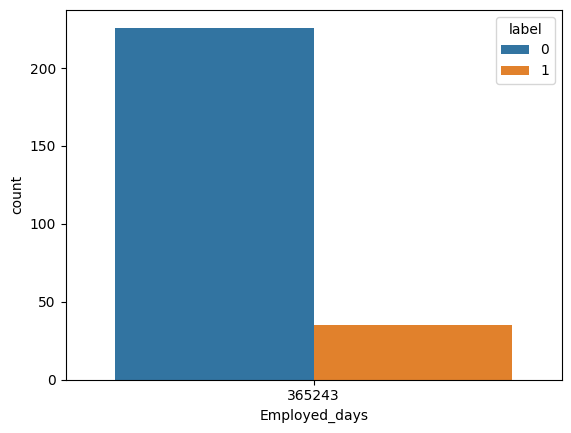

In [114]:
#plot the countplot of Employed_days with the label 
data = df[df['Employed_days']== 365243]
sns.countplot(data = data,x='Employed_days',hue ='label')

<Axes: ylabel='Employed_days'>

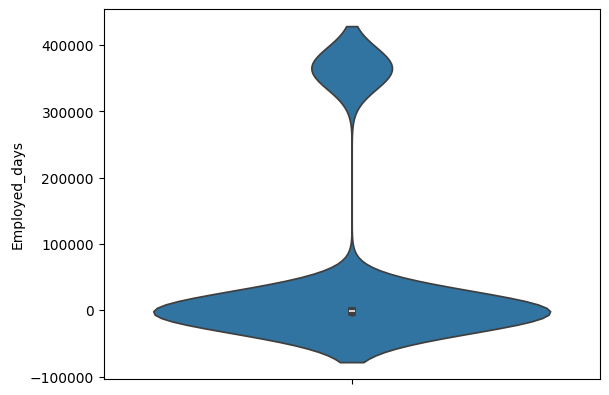

In [115]:
sns.violinplot(data =df ,y= 'Employed_days') # check 'Employed_days' with the violin plot

In [116]:
df['Employed_days'].value_counts().sort_values(ascending=False) # Count the appearence of the distinct values

Employed_days
 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-218         1
-1198        1
-5760        1
-1072        1
-2859        1
Name: count, Length: 956, dtype: int64

In [117]:
df['Employed_days']=df['Employed_days']/365 * -1 # change Employed_Days into years and convert negatice no into the positive

In [118]:
df['Employed_days']= df['Employed_days'].round(1) # round the value upto 1 first decimal

In [119]:
df['Employed_days']

0      -1000.7
1          1.6
2          1.6
3          1.6
4          1.6
         ...  
1543       6.0
1544       3.3
1545       6.8
1546       1.8
1547       7.8
Name: Employed_days, Length: 1548, dtype: float64

In [120]:
df[['Employed_days','label','Annual_income']].corr() # plot a correlation matrix to check relation between Employed_days ,
#label and annual_income

,Employed_days,label,Annual_income
Employed_days,1.000000,-0.031404,0.194132
label,-0.031404,1.000000,0.019082
Annual_income,0.194132,0.019082,1.000000


In [121]:
df.replace({'Employed_days':-1000.7},0,inplace=True) # replace the employed days with median of the employed days

count    1548.000000
mean        6.073773
std         6.584402
min         0.000000
25%         1.200000
50%         4.300000
75%         8.700000
max        40.800000
Name: Employed_days, dtype: float64

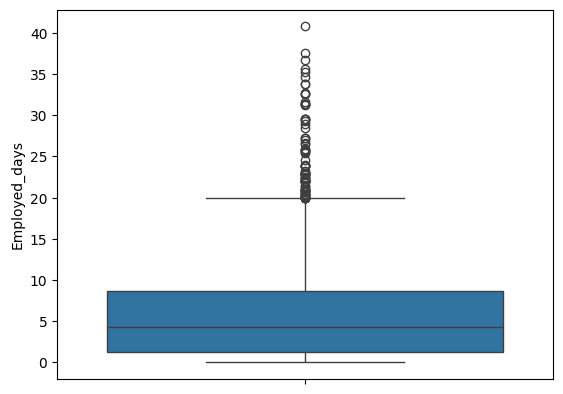

In [122]:
sns.boxplot(data = df,y='Employed_days') # check the outlier of employed_days
df['Employed_days'].describe()

In [123]:
# change the outlier of the employed_days of the with max of the IQR
max = df['Employed_days'].quantile(0.75) + 1.5*(df['Employed_days'].quantile(0.75)-df['Employed_days'].quantile(0.25))
df['Employed_days'] = np.where(df['Employed_days']>max,max,df['Employed_days']) 

count    1548.000000
mean        5.793314
std         5.711355
min         0.000000
25%         1.200000
50%         4.300000
75%         8.700000
max        19.950000
Name: Employed_days, dtype: float64

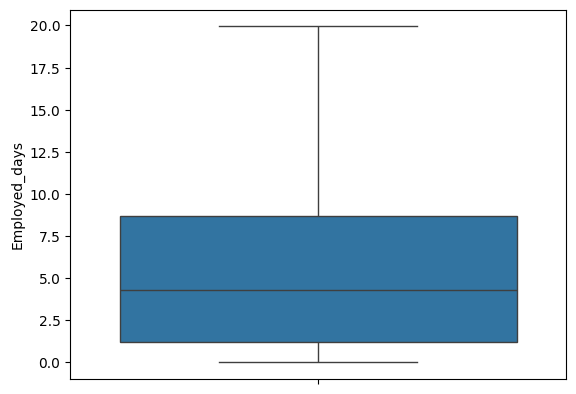

In [124]:
sns.boxplot(data = df,y='Employed_days')
df['Employed_days'].describe()

In [125]:
df.dropna(subset='GENDER',inplace=True) # remove nan values from gender columns

<Axes: xlabel='label', ylabel='count'>

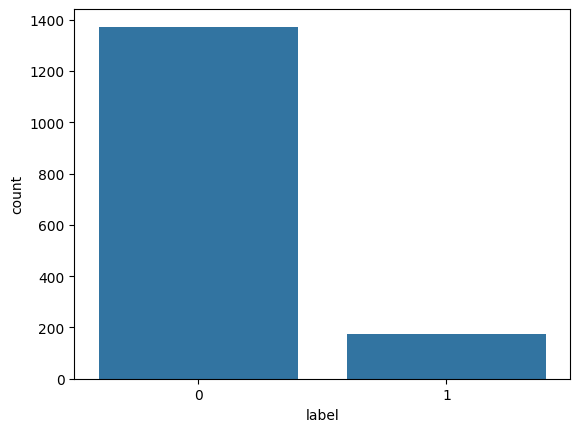

In [126]:
sns.countplot(data=df,x='label')# checking distribution of the target variable

Text(0.5, 1.0, 'Distribution of the labels')

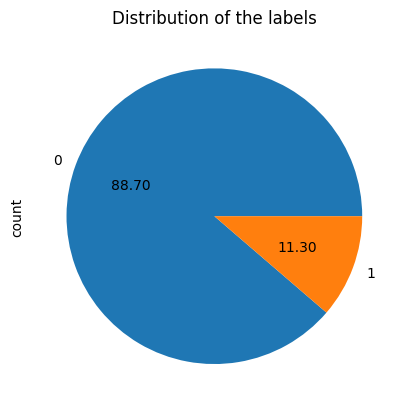

In [127]:
# distribution of the labels
df['label'].value_counts().plot.pie(autopct='%.2f')
plt.title('Distribution of the labels')

In [128]:
df.GENDER.value_counts() # check the value counts of the Gender 

GENDER
F                    973
M                    568
43.94614265965278      7
Name: count, dtype: int64

In [129]:
df = df[df['GENDER'] != 43.94614265965278]

Text(0.5, 0, 'Annual income in thousands')

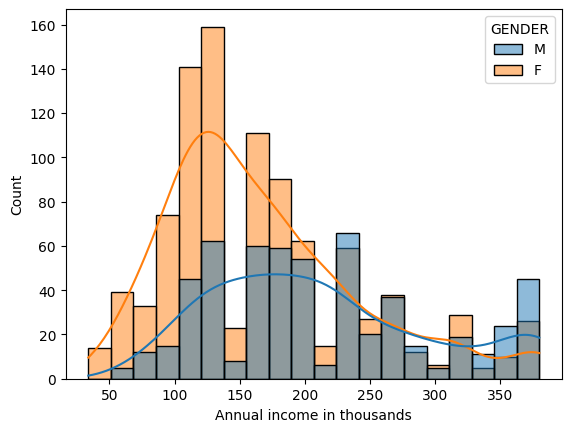

In [130]:
sns.histplot(x=df['Annual_income'],hue=df['GENDER'],kde=True)# annual income distribution in gender
plt.xlabel('Annual income in thousands')

In [131]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180.0,Pensioner,Higher education,Married,House / apartment,51.430137,0.0,43.946143,2,1
1,5009744,F,Y,N,0,315.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.6,43.946143,2,1
2,5009746,F,Y,N,0,315.0,Commercial associate,Higher education,Married,House / apartment,43.946143,1.6,43.946143,2,1
3,5009749,F,Y,N,0,166.5,Commercial associate,Higher education,Married,House / apartment,37.142466,1.6,43.946143,2,1
4,5009752,F,Y,N,0,315.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.6,43.946143,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166.5,Commercial associate,Higher education,Married,House / apartment,32.758904,6.0,Managers,2,0
1544,5023655,F,N,N,0,225.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.024658,3.3,Accountants,1,0
1545,5115992,M,Y,Y,2,180.0,Working,Higher education,Married,House / apartment,36.093151,6.8,Managers,4,0
1546,5118219,M,Y,N,0,270.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.895890,1.8,Drivers,2,0


In [132]:
df.replace({'Type_Occupation':43.94614265965278},'OTHER',inplace=True) # replace the 43.94614265965278 with the 'OTHER'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'OTHER'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Laborers'),
  Text(4, 0, 'Sales staff'),
  Text(5, 0, 'Accountants'),
  Text(6, 0, 'Managers'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Drivers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'High skill tech staff'),
  Text(11, 0, 'IT staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Security staff'),
  Text(14, 0, 'Medicine staff'),
  Text(15, 0, 'Private service staff'),
  Text(16, 0, 'HR staff'),
  Text(17, 0, 'Secretaries'),
  Text(18, 0, 'Realty agents')])

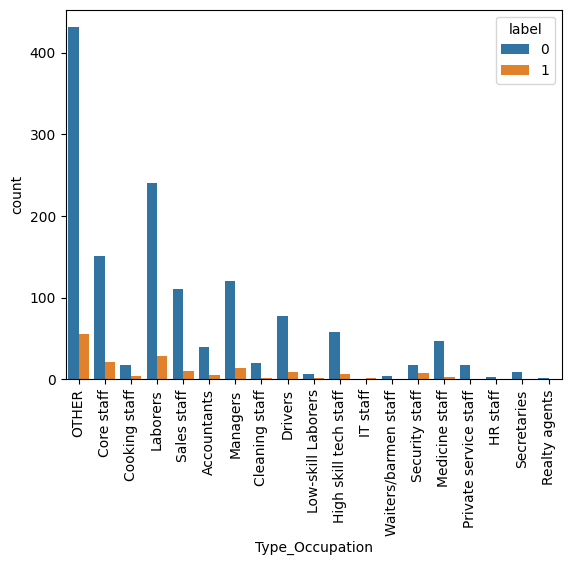

In [133]:
sns.countplot(x=df['Type_Occupation'],hue=df['label']) # plot the count plot 
plt.xticks(rotation = 90)

<Axes: ylabel='count'>

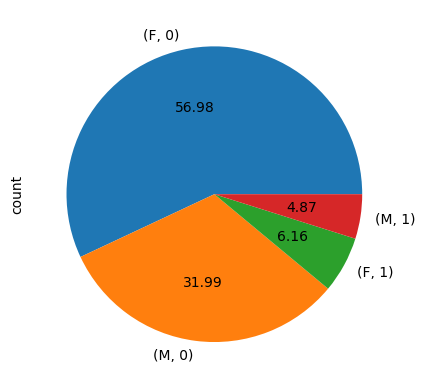

In [134]:
df[['GENDER','label']].value_counts().plot.pie(autopct='%.2f')

Text(0, 0.5, 'Age')

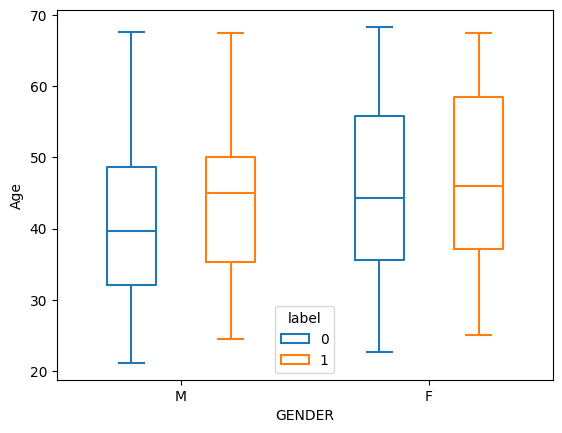

In [135]:
sns.boxplot(data = df,y='Birthday_count',x='GENDER',hue='label',gap=0.5,fill=False)
plt.ylabel('Age')

<Axes: xlabel='Propert_Owner', ylabel='count'>

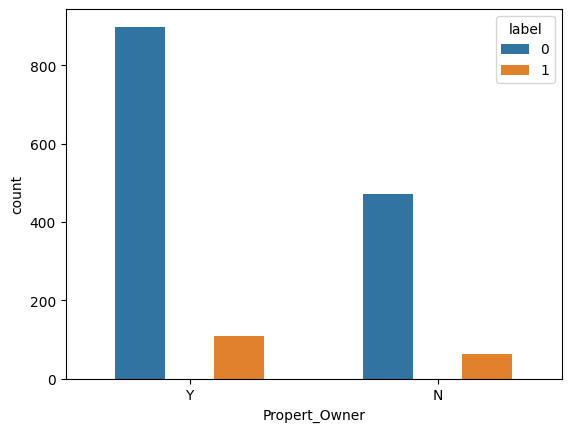

In [136]:
sns.countplot(data=df,x='Propert_Owner',hue='label',gap=0.5)

<Axes: xlabel='Family_Members', ylabel='CHILDREN'>

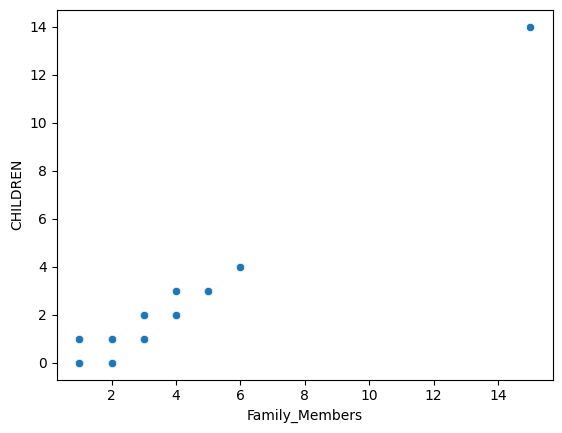

In [137]:
sns.scatterplot(data=df,y='CHILDREN',x='Family_Members')

In [138]:
categories = [i for i in df.columns if df[i].dtype == 'object'] # list of the features in which dtypes equals to object
categories
from sklearn.preprocessing import OrdinalEncoder # convert  features in the list into numerical
oe = OrdinalEncoder()
df[categories] = oe.fit_transform(df[categories])

<Axes: >

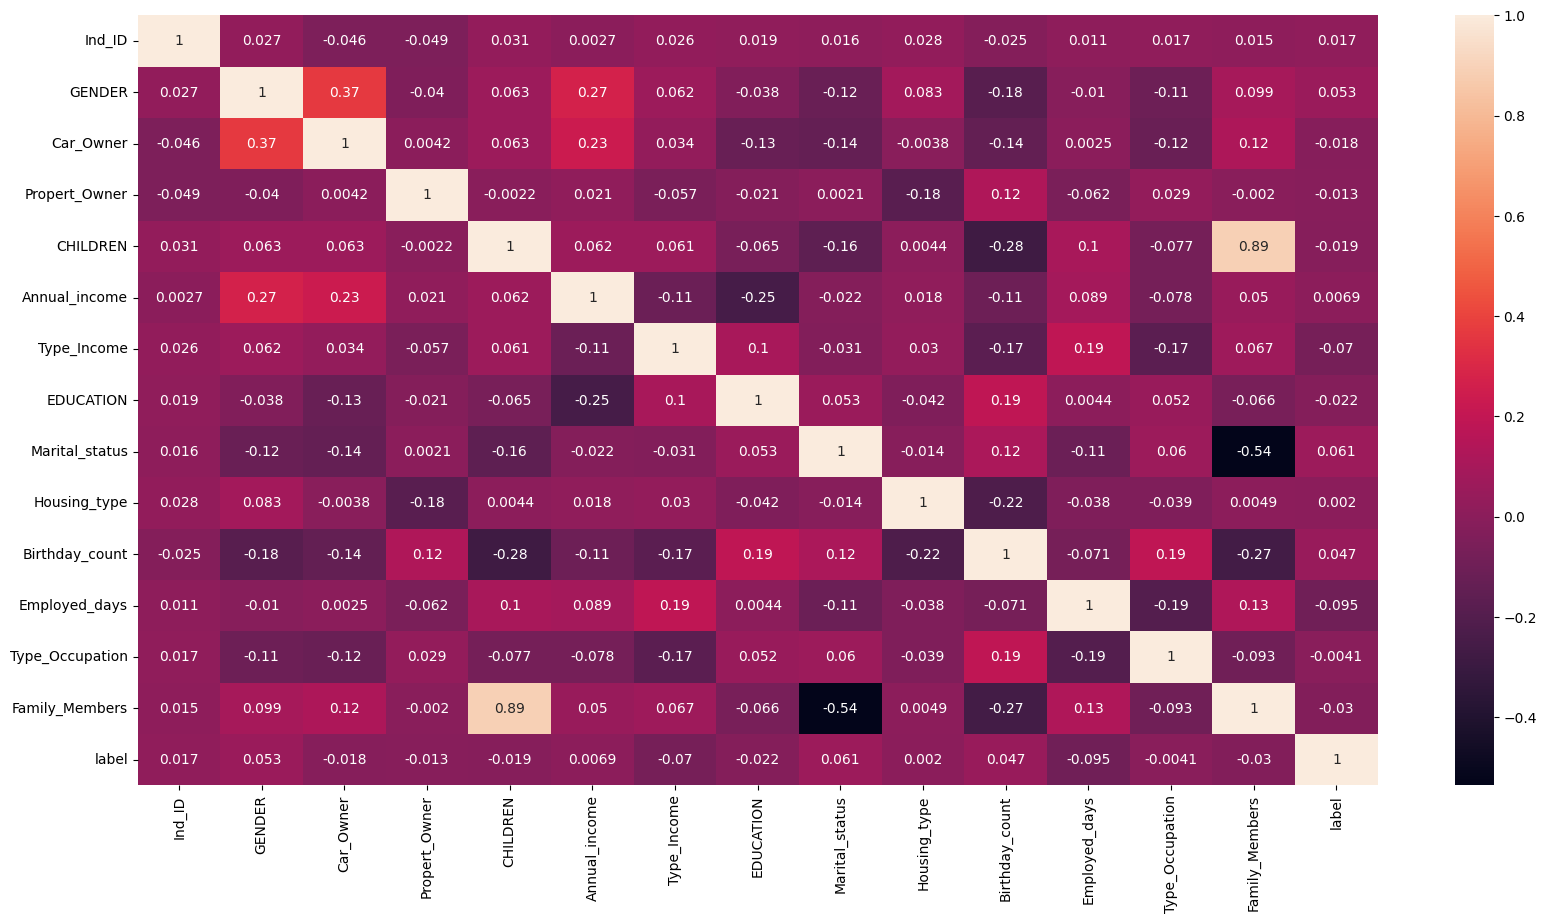

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [140]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'label'],
      dtype='object')

In [141]:
# Choose features and label
X = df.drop('label',axis=1)
Y = df.label



In [142]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X=ms.fit_transform(X)
X=pd.DataFrame(X,columns=['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members'])


In [143]:
# split the dataset in train and test subsets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [144]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
lr= LogisticRegression(random_state=1)
de = DecisionTreeClassifier(random_state=1)
svm = SVC(random_state=1)


In [145]:
# choose features from the dataset
for i in [lr,de]:
    rfe = RFE(i)
    rfe.fit(X_train,Y_train)
    print(f'Model : {i}')
    print(f'Features : {rfe.get_feature_names_out()}')

Model : LogisticRegression(random_state=1)
Features : ['Ind_ID' 'GENDER' 'Type_Income' 'Marital_status' 'Birthday_count'
 'Employed_days' 'Type_Occupation']
Model : DecisionTreeClassifier(random_state=1)
Features : ['Ind_ID' 'Annual_income' 'EDUCATION' 'Housing_type' 'Birthday_count'
 'Employed_days' 'Type_Occupation']


In [146]:
# fix the imbalanced class
from imblearn.over_sampling import SMOTE 
smtk = SMOTE(random_state=1)
X_res,Y_res=smtk.fit_resample(X_train,Y_train)

In [147]:
for i in [lr,de]:
    rfe = RFE(estimator=i)
    rfe.fit(X_train,Y_train)
    print(f'Model : {i} \nFeatures for {i} : {rfe.get_feature_names_out()}')

Model : LogisticRegression(random_state=1) 
Features for LogisticRegression(random_state=1) : ['Ind_ID' 'GENDER' 'Type_Income' 'Marital_status' 'Birthday_count'
 'Employed_days' 'Type_Occupation']
Model : DecisionTreeClassifier(random_state=1) 
Features for DecisionTreeClassifier(random_state=1) : ['Ind_ID' 'Annual_income' 'EDUCATION' 'Housing_type' 'Birthday_count'
 'Employed_days' 'Type_Occupation']


## Model 1- Decision Tree Model

In [148]:
columns = ['Ind_ID','Car_Owner','Propert_Owner','Annual_income','Birthday_count','Employed_days','Type_Occupation']
X_de = X_res[columns]
X_test_de=X_test[columns]

In [149]:
de.fit(X_de,Y_res)
pred = de.predict(X_test_de)

In [150]:
# use of the confusion matrix for the evauluation 
from sklearn.metrics import  confusion_matrix,classification_report
confusion_matrix(Y_test,pred)

array([[273,  62],
       [ 28,  23]], dtype=int64)

In [151]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       335
           1       0.27      0.45      0.34        51

    accuracy                           0.77       386
   macro avg       0.59      0.63      0.60       386
weighted avg       0.82      0.77      0.79       386



## MODEL 2 - LOGISTIC REGRESSION 



In [152]:
columns = ['GENDER','CHILDREN','Type_Income','Marital_status','Birthday_count','Employed_days','Type_Occupation']
X_lg = X_res[columns]
X_test_lg = X_test[columns]

In [153]:
lr.fit(X_lg,Y_res)
pred = lr.predict(X_test_lg)

In [154]:
# use of the confusion matrix for the evauluation 
from sklearn.metrics import  confusion_matrix
confusion_matrix(Y_test,pred)

array([[188, 147],
       [ 25,  26]], dtype=int64)

In [155]:
Y_train.value_counts()

label
0    1036
1     119
Name: count, dtype: int64

In [156]:
from sklearn.metrics  import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.56      0.69       335
           1       0.15      0.51      0.23        51

    accuracy                           0.55       386
   macro avg       0.52      0.54      0.46       386
weighted avg       0.79      0.55      0.63       386



## Model 3 - GradientBoostingClassifier

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_res, Y_res)
print('Accuracy of the gb classifier:',gb.score(X_res,Y_res))

Accuracy of the gb classifier: 0.8885135135135135


In [158]:
print(classification_report(gb.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       320
           1       0.27      0.21      0.24        66

    accuracy                           0.77       386
   macro avg       0.56      0.55      0.55       386
weighted avg       0.75      0.77      0.76       386



## Model 4 SVM 

In [159]:
svm.fit(X_res,Y_res)
print('Accuracy of the svm classifier:',gb.score(X_res,Y_res))

Accuracy of the svm classifier: 0.8885135135135135


In [160]:
print(classification_report(svm.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       286
           1       0.41      0.21      0.28       100

    accuracy                           0.72       386
   macro avg       0.59      0.55      0.55       386
weighted avg       0.67      0.72      0.68       386



## Model 5 Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

In [162]:
# Choose features and label
X = df.drop('label',axis=1)
Y = df.label

In [163]:
# split the dataset in train and test subsets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [164]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [165]:
pred = rf.predict(X_test)

In [166]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       361
           1       0.44      0.80      0.57        25

    accuracy                           0.92       386
   macro avg       0.71      0.87      0.76       386
weighted avg       0.95      0.92      0.93       386



In [167]:
print(confusion_matrix(pred,Y_test))

[[336  25]
 [  5  20]]
